In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 28s 2us/step


In [8]:
print(len(X_train))
len(X_test)

60000


10000

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train[0].shape

(28, 28)

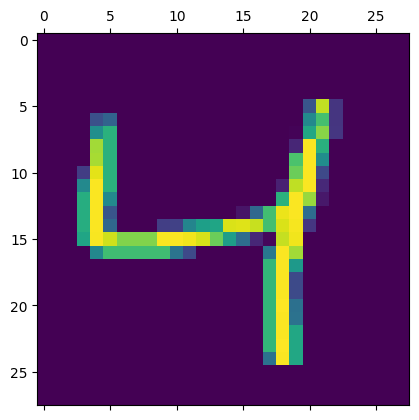

In [16]:
plt.matshow(X_train[2])

In [17]:
Y_train[2]

4

In [19]:
X_train_flat=X_train.reshape(60000,784)

In [20]:
X_train_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_test_flat=X_test.reshape(10000,784)

In [38]:
X_test_flat=X_test_flat/255 
X_train_flat=X_train_flat/255

In [39]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [70]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [71]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    
metrics=['accuracy'])

In [73]:
model.fit(X_train_flat,Y_train,epochs=23)

Epoch 1/23
1875/1875 [==============================] - 1s 512us/step - loss: 0.0232 - accuracy: 0.9926
Epoch 2/23
1875/1875 [==============================] - 1s 501us/step - loss: 0.0200 - accuracy: 0.9936
Epoch 3/23
1875/1875 [==============================] - 1s 499us/step - loss: 0.0159 - accuracy: 0.9949
Epoch 4/23
1875/1875 [==============================] - 1s 500us/step - loss: 0.0140 - accuracy: 0.9958
Epoch 5/23
1875/1875 [==============================] - 1s 499us/step - loss: 0.0120 - accuracy: 0.9963
Epoch 6/23
1875/1875 [==============================] - 1s 499us/step - loss: 0.0119 - accuracy: 0.9962
Epoch 7/23
1875/1875 [==============================] - 1s 497us/step - loss: 0.0099 - accuracy: 0.9969
Epoch 8/23
1875/1875 [==============================] - 1s 502us/step - loss: 0.0084 - accuracy: 0.9973
Epoch 9/23
1875/1875 [==============================] - 1s 498us/step - loss: 0.0079 - accuracy: 0.9976
Epoch 10/23
1875/1875 [==============================] - 1s 516u

In [74]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 0s 370us/step - loss: 0.1295 - accuracy: 0.9781


[0.1295258104801178, 0.9781000018119812]

In [76]:
prediction = model.predict(X_test_flat)

313/313 [==============================] - 0s 306us/step


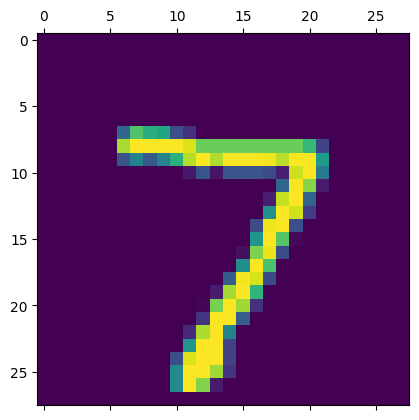

In [77]:
plt.matshow(X_test[0])

In [78]:
prediction[0]

array([1.7025961e-11, 2.5708448e-12, 5.4475859e-05, 4.5600873e-01,
       8.6208300e-17, 2.0717414e-06, 3.6109188e-15, 1.0000000e+00,
       2.6080513e-04, 1.7338647e-03], dtype=float32)

In [80]:
np.argmax(prediction[0])

7

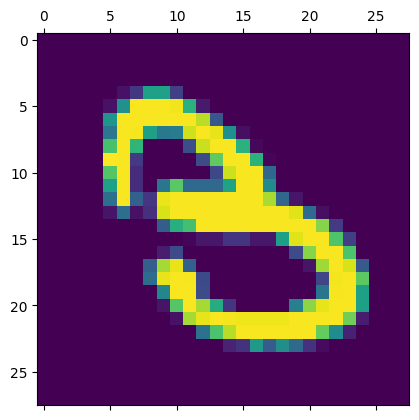

In [81]:
plt.matshow(X_test[18])

In [82]:
np.argmax(prediction[18])

8

In [83]:
predicted_final =[ np.argmax(i) for i in prediction ]
print(predicted_final)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [84]:
predicted_final[:5]

[7, 2, 1, 0, 4]

In [86]:
from sklearn.metrics import confusion_matrix
cm=sklearn.metrics.confusion_matrix(Y_test, predicted_final)

In [87]:
import seaborn as sns

<Axes: >

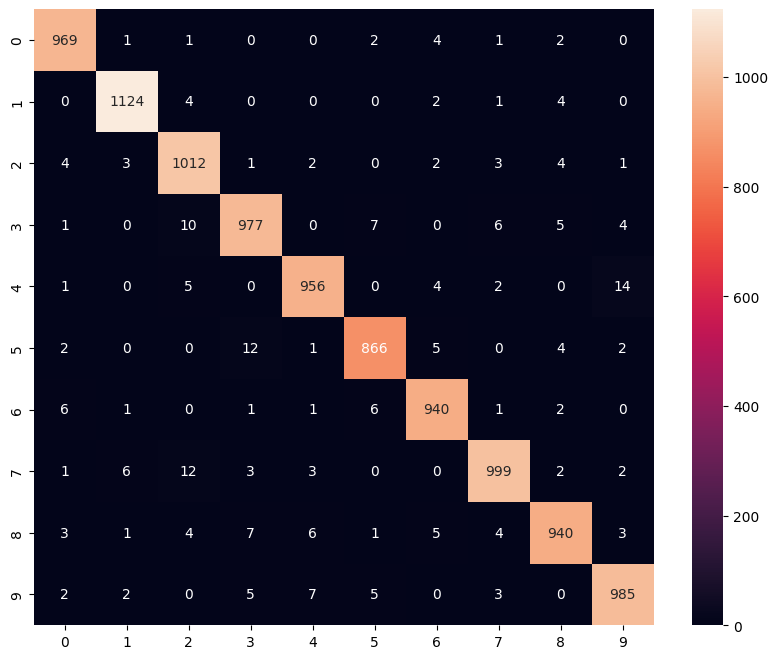

In [88]:
plt.figure(figsize=(10, 8))  
sns.heatmap(cm,annot=True,fmt='d')
